# CS 524
HW10 Sparsh Agarwal 9075905142

Q1. 

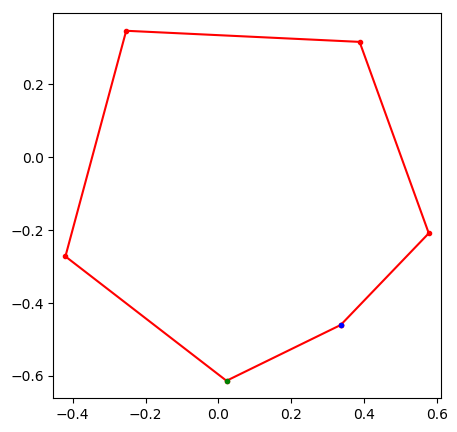

Optimal
Optimal area: 0.6749814196091032


In [105]:
using JuMP, Ipopt
n = 6
m = Model(solver = IpoptSolver(print_level=0))

@variable(m, x[1:n] )
@variable(m, y[1:n] )
#@constraint(m, x[1] == 0)
#@constraint(m, y[1] == 0)
for i = 1:n
    for j = 1:n
        if i==j
            
        else
            @constraint(m, (x[i]-x[j])^2 + (y[i]-y[j])^2 <= 1)
        end
    end
end
# add ordering constraint to the vertices
for i = 1:n-1
    @constraint(m, x[i]*y[i+1]-y[i]*x[i+1] >= 0 )
end
@constraint(m, x[n]*y[1]-y[n]*x[1] >= 0 )

@NLobjective(m, Max, 0.5*sum( x[i]*y[i+1]-y[i]*x[i+1] for i=1:n-1)  +  0.5*(x[n]*y[1]-y[n]*x[1]) )

srand(4)
setvalue(x,randn(n))
setvalue(y,randn(n))

status = solve(m)
println(status)
println("Optimal area: ", getobjectivevalue(m))
getvalue([x y])

using PyPlot
xopt = getvalue([x; x[1]])
yopt = getvalue([y; y[1]])
figure(figsize=[5,5])
plot( xopt, yopt, "r.-" )
plot( xopt[1], yopt[1], "b." )
plot( xopt[6], yopt[6], "g." )
axis("equal");

Q2.

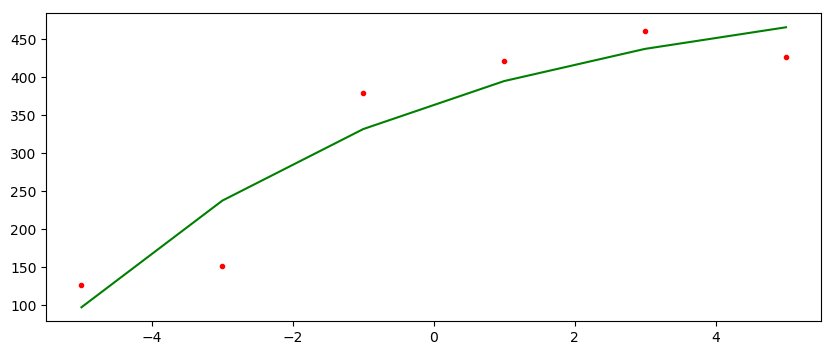

523.3055369939487
-156.94784160483013
-0.1996645707943486


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x137a5f910>

In [80]:
using Gurobi, Cbc, Mosek, PyPlot, JuMP, Ipopt

raw = [-5 127
-3 151
-1 379
1 421
3 460
5 426]

x = raw[:,1]
y = raw[:,2]
# println(x)
# println(y)

m = Model(solver = IpoptSolver(print_level=0))
# @variable(m, yopt[1:6])
@variable(m ,k1)
@variable(m ,k2)
@variable(m ,k3)
setvalue(k1, 500) 
setvalue(k2, -200) 
setvalue(k3, -1) 

# for i in 1:6
#     @NLexpression(m, expr[i in 1:6], k1 + k2*exp(k3*x[i]))
# end

@NLobjective(m, Min, sum(((k1 + k2*exp(k3*x[i]))-y[i])^2 for i in 1:6))
solve(m)

println(getvalue(k1))
println(getvalue(k2))
println(getvalue(k3))
k1opt = getvalue(k1)
k2opt = getvalue(k2)
k3opt = getvalue(k3)
using PyPlot
figure(figsize=(10,4))
# xvaluess = linspace(-6,6,)
for i in 1:6
    yvals[i] = k1opt + k2opt*exp(k3opt*x[i])
end
plot(x,yvals,"g-")
plot(x,y,"r.")